In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2

df_test = pd.read_csv('/home/yandex/igor/data_eyes/csv/altyn_frames_podium_const_sep_norm.csv', sep=';')
df_test

,file,blink,bounding_box,bounding_box_center_x,bounding_box_center_x_deviation,bounding_box_center_y,bounding_box_center_y_deviation,bounding_box_height,bounding_box_height_relative,bounding_box_width,...,light_lighting,num_of_all_faces,object,sharpness,smile,up_down,width,const_left,const_right,person_id
0,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000002,"14,26,98,110",56,0.000000,68,0.107143,84,0.750000,84,...,0.138742,1,0.000339,0.6875,2.917881e-04,0.214286,112,0.903226,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
1,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"13,27,97,111",55,-0.008929,69,0.116071,84,0.750000,84,...,0.116140,1,0.000401,0.7500,3.369366e-04,0.214286,112,0.935484,0.852941,445493eb-d0fa-4670-b785-bb3d2e10082d
2,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.088437,1,0.000548,0.6875,2.373873e-04,0.228916,112,1.000000,0.911765,445493eb-d0fa-4670-b785-bb3d2e10082d
3,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000011,"13,28,95,110",54,-0.017857,69,0.116071,82,0.732143,82,...,0.182376,1,0.002567,0.6875,3.690342e-04,0.219512,112,0.838710,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
4,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000007,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.082775,1,0.000317,0.6875,2.285370e-04,0.228916,112,0.838710,0.823529,445493eb-d0fa-4670-b785-bb3d2e10082d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319690,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000172,"12,23,102,112",57,0.008929,67,0.102679,89,0.794643,90,...,0.020605,1,0.000040,1.0000,1.551610e-06,-0.168539,112,0.250000,0.260000,bdc8b735-3bda-486c-a35b-97354b62e925
3319691,/mnt/data/frames/altyn_original_fps_igor_origa...,0.001776,"10,21,101,112",55,-0.004464,66,0.093750,91,0.812500,91,...,0.027885,1,0.000046,1.0000,6.048799e-07,-0.142857,112,0.220000,0.270000,bdc8b735-3bda-486c-a35b-97354b62e925
3319692,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000220,"12,21,101,110",56,0.004464,65,0.084821,89,0.794643,89,...,0.079881,1,0.000019,1.0000,2.153785e-06,-0.191011,112,0.240000,0.240000,bdc8b735-3bda-486c-a35b-97354b62e925
3319693,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000194,"12,22,104,112",58,0.017857,67,0.098214,90,0.803571,92,...,0.018007,1,0.000033,1.0000,2.645185e-06,-0.155556,112,0.220000,0.230000,bdc8b735-3bda-486c-a35b-97354b62e925


<AxesSubplot:>

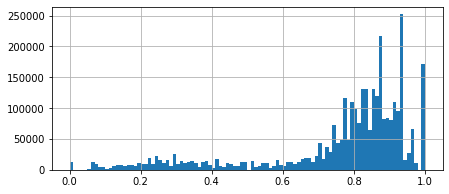

In [2]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

In [3]:
rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]


leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]


midwayBetweenEyes = [168]

noseTip = [1]


In [4]:

rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]
rightEyeUpper1 = [247, 30, 29, 27, 28, 56, 190]
rightEyeLower1 = [130, 25, 110, 24, 23, 22, 26, 112, 243]
rightEyeUpper2 = [113, 225, 224, 223, 222, 221, 189]
rightEyeLower2 = [226, 31, 228, 229, 230, 231, 232, 233, 244]
rightEyeLower3 = [143, 111, 117, 118, 119, 120, 121, 128, 245]

leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]
leftEyeUpper1 = [467, 260, 259, 257, 258, 286, 414]
leftEyeLower1 = [359, 255, 339, 254, 253, 252, 256, 341, 463]
leftEyeUpper2 = [342, 445, 444, 443, 442, 441, 413]
leftEyeLower2 = [446, 261, 448, 449, 450, 451, 452, 453, 464]
leftEyeLower3 = [372, 340, 346, 347, 348, 349, 350, 357, 465]


288
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/988e707e-cff1-456f-b462-3e81f221136d/0094.jpg
/mnt/data/frames/altyn_original_fps_igor/988e707e-cff1-456f-b462-3e81f221136d/0094.jpg


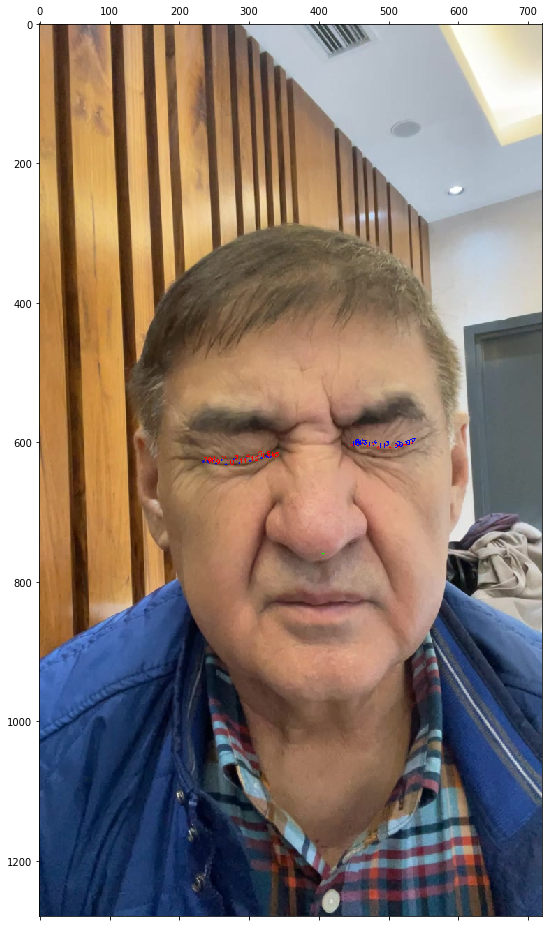

In [18]:
def check_landm(basename, left_eye, right_eye, centre_nose):
    plt.rcParams['figure.figsize'] = [500, 500]
    display = True

    color = (255, 0, 0)
    color2 = (0, 0, 255)
    color3 = (0, 255, 0)

    img = cv2.imread(basename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(left_eye)):
        p = tuple(left_eye[i])
        cv2.circle(img, p, 1, color, 1, cv2.LINE_AA)
        cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color2, 1)

    for i in range(len(right_eye)):
        p = tuple(right_eye[i])
        cv2.circle(img, p, 1, color2, 1, cv2.LINE_AA)
        cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1)
    p = tuple(centre_nose)
    cv2.circle(img, p, 1, color3, 1, cv2.LINE_AA)
    if display:
        plt.matshow(img)
        plt.show()
shift = len('/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112')
src = '/mnt/data/frames/altyn_original_fps_igor_mediapipe_lndm_npy'
#/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/988e707e-cff1-456f-b462-3e81f221136d/0094.jpg

for index, row in df_test[288:289].iterrows():
    file = row['file']
    filename = '/mnt/data/frames/altyn_original_fps_igor' + file[shift:]
    npy_file=os.path.join(src, file.split('/')[-2] + '_' + file.split('/')[-1] + ".npy")
    print(index)
    print(file)
    print(filename)
    data = np.load(npy_file)
    
    image = cv2.imread(filename)
    h, w, ch = image.shape
    left_eye = []
    right_eye = []
    centre_nose = (( int(data[1][0] * w), int(data[1][1] * h) ))

    for i in leftEyeUpper0+leftEyeLower0:
            left_eye.append(( int(data[i][0] * w), int(data[i][1] * h) ))
    for i in rightEyeUpper0+rightEyeLower0:
        right_eye.append(( int(data[i][0] * w), int(data[i][1] * h) ))
    """for i in leftEyeLower0:
        left_eye.append(data[i][:2])
    for i in rightEyeUpper0:
        right_eye.append(data[i][:2])"""
    #print('right_eye = ',right_eye)
    check_landm(filename, left_eye, right_eye, centre_nose)


In [7]:
import time
def eye_hw(data):
    def Euclidian_distant(xy1, xy2):
        return ((xy1[0]-xy2[0])**2+(xy1[1]-xy2[1])**2)**0.5

    rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
    rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]

    leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
    leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]

    left_eye = []
    right_eye = []
    left_eye_down = []
    right_eye_down = []
    centre_nose = data[1]

    for i in leftEyeUpper0:
        left_eye.append(data[i][:2])
    for i in rightEyeUpper0:
        right_eye.append(data[i][:2])
    for i in leftEyeLower0:
        left_eye_down.append(data[i][:2])
    for i in rightEyeLower0:
        right_eye_down.append(data[i][:2])

    left_eye_max_h = Euclidian_distant(left_eye[3], left_eye_down[4])
    left_eye_h = 1/7*(
                 Euclidian_distant(left_eye[0], left_eye_down[1])+
                 Euclidian_distant(left_eye[1], left_eye_down[2])+
                 Euclidian_distant(left_eye[2], left_eye_down[3])+
                 Euclidian_distant(left_eye[3], left_eye_down[4])+
                 Euclidian_distant(left_eye[4], left_eye_down[5])+
                 Euclidian_distant(left_eye[5], left_eye_down[6])+
                 Euclidian_distant(left_eye[6], left_eye_down[7]))
    left_eye_w = Euclidian_distant(left_eye_down[0], left_eye_down[8])

    right_eye_max_h = Euclidian_distant(right_eye[3], right_eye_down[4])    
    right_eye_h = 1/7*(
                 Euclidian_distant(right_eye[0], right_eye_down[1])+
                 Euclidian_distant(right_eye[1], right_eye_down[2])+
                 Euclidian_distant(right_eye[2], right_eye_down[3])+
                 Euclidian_distant(right_eye[3], right_eye_down[4])+
                 Euclidian_distant(right_eye[4], right_eye_down[5])+
                 Euclidian_distant(right_eye[5], right_eye_down[6])+
                 Euclidian_distant(right_eye[6], right_eye_down[7]))
    right_eye_w = Euclidian_distant(right_eye_down[0], right_eye_down[8])

    hw_left = [left_eye_max_h, left_eye_h, left_eye_w]                                  
    hw_right = [right_eye_max_h, right_eye_h, right_eye_w]  
    return hw_left, hw_right

def const_faces_spider(df):
    shift = len('/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112')
    src = '/mnt/data/frames/altyn_original_fps_igor_lndm_npy'
    for index, row in df.iterrows():
        file = row['file']
        npy_file=os.path.join(src, file.split('/')[-2] + '_' + file.split('/')[-1] + ".npy")
        print(index)
        data = np.load(npy_file)
        
        #start_time = time.time()
        
        hw_left, hw_right = eye_hw(data)

        const_l = round(hw_left[1]/hw_left[2], 3)
        const_r = round(hw_right[1]/hw_right[2], 3)

        df.loc[index, 'const_left2'] = const_l
        df.loc[index, 'const_right2'] = const_r
        #print( '{}: {} ms'.format(index, int( (time.time() - start_time)*1000  ) ) )

    return df
def const_faces_mediapipe(df):
    shift = len('/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112')
    src = '/mnt/data/frames/altyn_original_fps_igor_mediapipe_lndm_npy'
    for index, row in df.iterrows():
        file = row['file']
        npy_file=os.path.join(src, file.split('/')[-2] + '_' + file.split('/')[-1] + ".npy")
        print(index)
        data = np.load(npy_file)
        
        #start_time = time.time()
        
        hw_left, hw_right = eye_hw(data)

        const_l = round(hw_left[1]/hw_left[2], 3)
        const_r = round(hw_right[1]/hw_right[2], 3)

        df.loc[index, 'const_left3'] = const_l
        df.loc[index, 'const_right3'] = const_r
        #print( '{}: {} ms'.format(index, int( (time.time() - start_time)*1000  ) ) )

    return df
df_spider = const_faces_spider(df_test[:1000])
df = const_faces_mediapipe(df_spider)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


/tmp/ipykernel_27094/1191608559.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_left2'] = const_l
/tmp/ipykernel_27094/1191608559.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_right2'] = const_r


169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418


/tmp/ipykernel_27094/1191608559.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_left3'] = const_l
/tmp/ipykernel_27094/1191608559.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_right3'] = const_r


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
#Просто делаем нормализацию констант для каждой группы картинок person_id по отдельности
person_id_previous=''
index_list = []
const_left_list = []
const_right_list = []
df = pd.concat([df, df[:1]], ignore_index=True, sort=False)

for index, row in df.iterrows():
    print(index)
    person_id = row['person_id']
    file = row['file']
    blink = row['blink']
    const_left = row['const_left3']
    const_right = row['const_right3']

    if person_id != person_id_previous:
        for i in range(len(const_left_list)):
            df.loc[index_list[i], 'const_left3'] = const_left_list[i]/(max(const_left_list)+0.000000000001)
            df.loc[index_list[i], 'const_right3'] = const_right_list[i]/(max(const_right_list)+0.000000000001)

        index_list = []
        const_left_list = []
        const_right_list = []
        person_id_previous = person_id
        
    const_left_list.append(const_left)
    const_right_list.append(const_right)
    index_list.append(index)
df = df[:-1]
df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,file,blink,bounding_box,bounding_box_center_x,bounding_box_center_x_deviation,bounding_box_center_y,bounding_box_center_y_deviation,bounding_box_height,bounding_box_height_relative,bounding_box_width,...,smile,up_down,width,const_left,const_right,person_id,const_left2,const_right2,const_left3,const_right3
0,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000002,"14,26,98,110",56,0.000000,68,0.107143,84,0.750000,84,...,0.000292,0.214286,112,0.903226,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d,0.217,0.214,0.965347,0.902062
1,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"13,27,97,111",55,-0.008929,69,0.116071,84,0.750000,84,...,0.000337,0.214286,112,0.935484,0.852941,445493eb-d0fa-4670-b785-bb3d2e10082d,0.212,0.215,0.960396,0.912371
2,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.000237,0.228916,112,1.000000,0.911765,445493eb-d0fa-4670-b785-bb3d2e10082d,0.212,0.215,0.935644,0.932990
3,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000011,"13,28,95,110",54,-0.017857,69,0.116071,82,0.732143,82,...,0.000369,0.219512,112,0.838710,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d,0.211,0.214,0.915842,0.917526
4,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000007,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.000229,0.228916,112,0.838710,0.823529,445493eb-d0fa-4670-b785-bb3d2e10082d,0.213,0.215,0.905941,0.922680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000015,"6,20,102,112",54,-0.017857,66,0.089286,92,0.821429,96,...,0.000178,0.173913,112,0.931034,0.892857,c0c6ed2d-9f45-4d23-abe8-828d79296199,0.223,0.238,0.955882,0.951049
996,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000021,"4,19,101,112",52,-0.031250,65,0.084821,93,0.830357,97,...,0.000263,0.182796,112,0.793103,0.785714,c0c6ed2d-9f45-4d23-abe8-828d79296199,0.223,0.235,0.897059,0.902098
997,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000012,"6,20,102,112",54,-0.017857,66,0.089286,92,0.821429,96,...,0.000132,0.173913,112,1.000000,0.928571,c0c6ed2d-9f45-4d23-abe8-828d79296199,0.218,0.236,0.941176,0.923077
998,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000013,"4,19,102,112",53,-0.026786,65,0.084821,93,0.830357,98,...,0.000137,0.182796,112,0.931034,0.928571,c0c6ed2d-9f45-4d23-abe8-828d79296199,0.223,0.237,0.970588,0.979021


<AxesSubplot:>

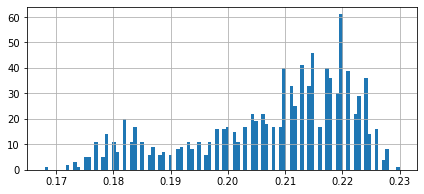

In [9]:
df['const_left2'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

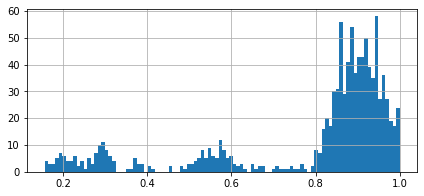

In [10]:
df['const_left3'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

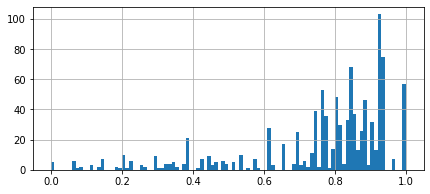

In [11]:
df['const_left'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

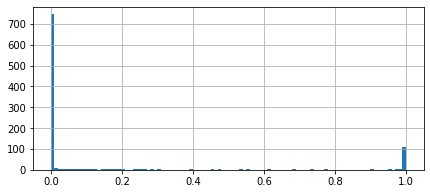

In [12]:
df['blink'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

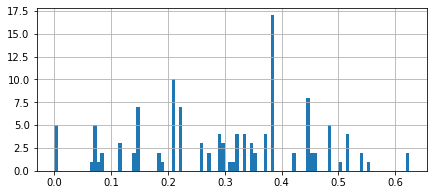

In [13]:
df[df.blink > 0.9]['const_left'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

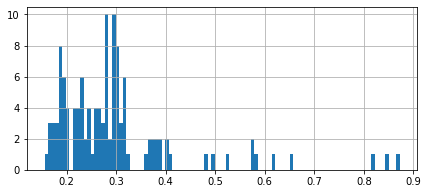

In [14]:
df[df.blink > 0.9]['const_left3'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

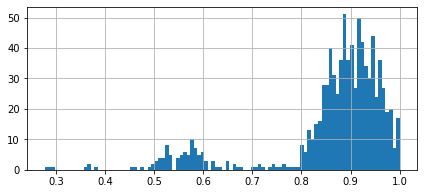

In [15]:
df[df.blink < 0.9]['const_left3'].hist(bins = 100, figsize = (7, 3))

In [ ]:
min(df['const_left3'])

In [21]:
#df[df.blink > 0.95][df.const_left3 > 0.3]

In [1]:
plt.rcParams['figure.figsize'] = [10, 10]

for i,row in df[df.blink > 0.95][df.const_left3 > 0.3][:1].iterrows():#df[df.person_id=='c0c6ed2d-9f45-4d23-abe8-828d79296199'].iterrows():
    file = row['file']
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.show()
    print(i)
    print(row['file'])
    #print('object =', row['object'])
    #print('low_resolution =', row['low_resolution'])
    print('confidence = ', row['confidence'])
    print('blink = ', row['blink'])
    print('const_left = ', row['const_left'])
    print('const_right = ', row['const_right'])
    #print('const_left2 = ', row['const_left2'])
    #print('const_right2 = ', row['const_right2'])
    print('const_left3 = ', row['const_left3'])
    print('const_right3 = ', row['const_right3'])
    print('\n')

NameError: name 'plt' is not defined